## 1.import module

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2.Data analysis

In [2]:
df = pd.read_csv('./data/aug_train.csv')
df.shape

(19158, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [7]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


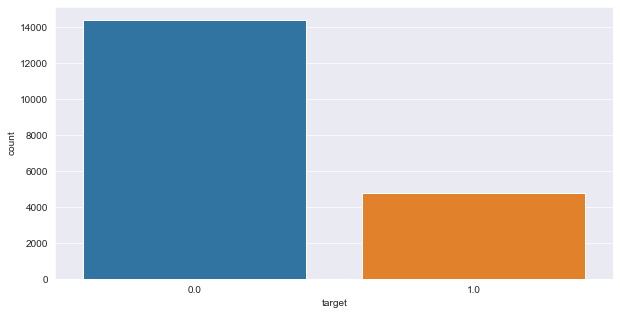

In [8]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(x='target',data=df)
plt.show()

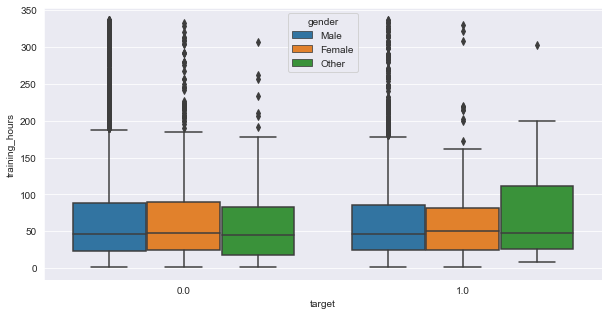

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target', y='training_hours', data=df, hue='gender') #Box plot to show outliers
plt.show()

## 3. Data pre-process

### delete feature

In [10]:
df.drop("enrollee_id",axis=1,inplace=True)

### 3.1 Cleaning null value

In [11]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
df.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,city_115,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,50-99,Funded Startup,1,24,1.0
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


### 3.2 outlier

In [12]:
# Obtaining upper and lower bounds and detecting outliers by means of statistical quadrature differences
data = df
col = 'training_hours'
threshold = 3

IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
para = (Upper_fence, Lower_fence)
tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
outlier_index = tmp.any(axis=1)
print('Num of outlier detected:',outlier_index.value_counts()[1])
print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))

index = outlier_index
print('Upper bound:',para[0],'\nLower bound:',para[1])



Num of outlier detected: 275
Proportion of outlier detected 0.014354316734523438
Upper bound: 283.0 
Lower bound: -172.0


In [13]:
# check the 275 found outliers
df.loc[index,'training_hours'].sort_values()

15213    284
13287    284
7090     284
1249     284
1213     284
        ... 
13753    336
16785    336
2056     336
4794     336
15615    336
Name: training_hours, Length: 275, dtype: int64

In [14]:
# drop outliers
data.loc[index,col] = data[col].mean()
print(data.training_hours.max())
print(data.training_hours.min())
df = data

282.0
1.0


In [15]:
# check the 275 found outliers
df.loc[index,'training_hours'].sort_values()

89       65.366896
12819    65.366896
12846    65.366896
12941    65.366896
13223    65.366896
           ...    
6031     65.366896
5734     65.366896
5645     65.366896
6583     65.366896
19118    65.366896
Name: training_hours, Length: 275, dtype: float64

### 3.3 Correlation analysis

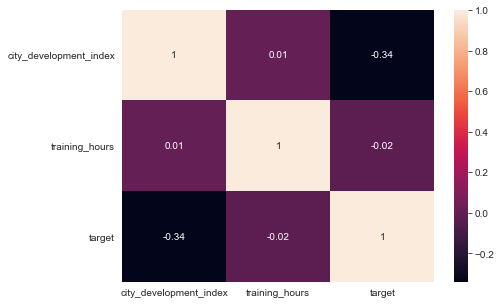

In [16]:
plt.figure(figsize=(7,5))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


In [17]:
df.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36.0,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83.0,0.0
3,city_115,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0.0
5,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,50-99,Funded Startup,1,24.0,1.0
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24.0,0.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18.0,1.0
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46.0,1.0
9,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123.0,0.0


### 3.4 Feature Engineering

### 3.4.1 Onehot encoder

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = OneHotEncoder(drop='first',dtype=np.int)
df_onehot = df[['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']]
df_onehot = encoder.fit_transform(df_onehot).toarray()
df_onehot = pd.DataFrame(df_onehot)
df = pd.concat([df,df_onehot],axis=1)
df.drop(['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job'],axis=1,inplace=True)


In [19]:
df

,city_development_index,training_hours,target,0,1,2,3,4,5,6,...,164,165,166,167,168,169,170,171,172,173
0,0.920,36.0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.776,47.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.624,83.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.789,52.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.767,8.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42.0,1.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19154,0.920,52.0,1.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
19155,0.920,44.0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
19156,0.802,97.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [20]:
# Split dataset
X = df.drop("target",axis=1)
y = df["target"]

### 3.4.2 PCA

In [21]:
from sklearn.decomposition import PCA
n_components = 150
pca = PCA(n_components)
X = pca.fit_transform(X)
print(X.shape)

(19158, 150)


### 3.4.3 SMOTE

In [22]:
# Oversampling for the complete data set
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=0)
smote_X, smote_y = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(smote_y))

Original dataset shape Counter({0.0: 14381, 1.0: 4777})
Resampled dataset shape Counter({1.0: 14381, 0.0: 14381})


### 3.5 Split dataset

In [23]:
# X = df.drop("target",axis=1)
# y = df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

print('data_set：{}, train_set：{}, test_set：{}'.format(len(X), len(X_train), len(X_test)))

data_set：19158, train_set：14368, test_set：4790


In [24]:
# Oversampling for the training data set
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0.0: 10779, 1.0: 3589})
Resampled dataset shape Counter({0.0: 10779, 1.0: 10779})


### 3.6 Feature scaler

In [25]:
print('Before scaler in X_train, Max value: {}, Minimum value: {}'.format(X_train.max(),X_train.min()))
print('Before scaler in X_test, Max value: {}, Minimum value: {}'.format(X_test.max(),X_test.min()))

Before scaler in X_train, Max value: 220.16658089016533, Minimum value: -60.83378725833153
Before scaler in X_test, Max value: 220.1664679269448, Minimum value: -59.83396103752553


In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [27]:
print('After scaler in X_train, Max value: {}, Minimum value: {}'.format(X_train.max(),X_train.min()))
print('After scaler in X_test, Max value: {}, Minimum value: {}'.format(X_test.max(),X_test.min()))


After scaler in X_train, Max value: 1.0000000000000002, Minimum value: 0.0
After scaler in X_test, Max value: 1.2658585834912461, Minimum value: -0.13344451680674752


## 4. Applied machine learning algorithms

### 4.1 Default Model

In [28]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [29]:
# timer function
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [30]:
#Results table
models_result_table = pd.DataFrame(columns=["Models","Train Accuracy Score","Test Accuracy Score"])


In [31]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('ANN', MLPClassifier()))
models.append(('SVM', SVC()))
models.append(('Naive_bayes', MultinomialNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('XGboost', XGBClassifier()))
models.append(('LightGBM', LGBMClassifier()))

# evaluate each model in turn
results = []
names = []

In [32]:
for name, model in models:
    start_time = timer(None) # timing starts from this point for "start_time" variable
    model.fit(X_train, y_train)
    print(name)
    timer(start_time) # timing ends here for "start_time" variable
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    new_row = {"Models": name, "Train Accuracy Score": train_score,"Test Accuracy Score": test_score}
    models_result_table = models_result_table.append(new_row, ignore_index=True)

LogisticRegression
Time taken: 0 hours 0 minutes and 0.36 seconds.
ANN
Time taken: 0 hours 0 minutes and 47.69 seconds.
SVM
Time taken: 0 hours 0 minutes and 37.34 seconds.
Naive_bayes
Time taken: 0 hours 0 minutes and 0.01 seconds.
KNN
Time taken: 0 hours 0 minutes and 0.01 seconds.
DecisionTree
Time taken: 0 hours 0 minutes and 4.86 seconds.
[19:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost
Time taken: 0 hours 0 minutes and 15.09 seconds.
LightGBM
Time taken: 0 hours 0 minutes and 1.08 seconds.


In [33]:
# Comparison of Machine Learning Models
models_result_table.sort_values(by="Test Accuracy Score", ascending=False)

,Models,Train Accuracy Score,Test Accuracy Score
2,SVM,0.835282,0.773904
7,LightGBM,0.885193,0.753653
3,Naive_bayes,0.715048,0.747599
0,LogisticRegression,0.737174,0.745929
6,XGboost,0.971148,0.742171
1,ANN,0.861861,0.704802
5,DecisionTree,0.999443,0.654280
4,KNN,0.856851,0.652610


### 4.2 Different SMOTE methods results

In [34]:
# different SMOTE results
preprocess_result_table = pd.DataFrame(columns=["Methods","LR/Test Accuracy Score"])

In [35]:
# SMOTE_train
model = LogisticRegression()
model.fit(X_train,y_train)
    
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
    
new_row = {"Methods": 'SMOTE_train', "LR/Test Accuracy Score": test_score}
preprocess_result_table = preprocess_result_table.append(new_row, ignore_index=True)

In [36]:
# SMOTE_dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(smote_X, smote_y,test_size=0.25,random_state=0)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

model = LogisticRegression()
model.fit(X_train1,y_train1)
    
train_score = model.score(X_train1, y_train1)
test_score = model.score(X_test1, y_test1)
    
new_row = {"Methods": 'SMOTE_df', "LR/Test Accuracy Score": test_score}
preprocess_result_table = preprocess_result_table.append(new_row, ignore_index=True)

In [37]:
# Comparison of SMOTE methods
preprocess_result_table.sort_values(by="LR/Test Accuracy Score", ascending=False)

,Methods,LR/Test Accuracy Score
0,SMOTE_train,0.745929
1,SMOTE_df,0.726186


### 5 Model Tunning

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### LogisticRegression

In [39]:
parameters = {
    'C':[0.01, 0.1, 1], 
    'penalty':['l1', 'l2']
}
grid_search_lr = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring='accuracy')
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search_lr.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('Best parameter:',grid_search_lr.best_params_)
print('Highest validation set score:',grid_search_lr.best_score_)

Time taken: 0 hours 0 minutes and 4.66 seconds.
Best parameter: {'C': 0.1, 'penalty': 'l2'}
Highest validation set score: 0.7333717430794676


In [40]:
# best model
best_model = grid_search_lr.best_estimator_
print('Accuracy on test set:', best_model.score(X_test, y_test))

Accuracy on test set: 0.7524008350730689


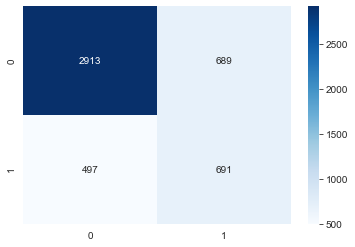

In [41]:
# Confusion matrix: the diagonal is the number of prediction pairs and the total of each row is the number of prediction sets
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,fmt="d",cmap='Blues')


In [42]:
# classification report
from sklearn.metrics import classification_report
target_names = ['Rejected','Accepted']
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.85      0.81      0.83      3602
    Accepted       0.50      0.58      0.54      1188

    accuracy                           0.75      4790
   macro avg       0.68      0.70      0.68      4790
weighted avg       0.77      0.75      0.76      4790



### ANN MLPClassifier

In [43]:
parameters = {
    'hidden_layer_sizes':[90, 110], 
    'max_iter':[190, 210]
}
random_search_mlpc = RandomizedSearchCV(MLPClassifier(), parameters, cv=5, scoring='accuracy', n_iter=10)

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_mlpc.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('Best parameter:',random_search_mlpc.best_params_)
print('Highest validation set score:',random_search_mlpc.best_score_)

Time taken: 0 hours 12 minutes and 40.82 seconds.
Best parameter: {'max_iter': 210, 'hidden_layer_sizes': 110}
Highest validation set score: 0.7998462211480405


In [44]:
# best model
best_model = random_search_mlpc.best_estimator_
print('Accuracy on test set:', best_model.score(X_test, y_test))

Accuracy on test set: 0.7369519832985386


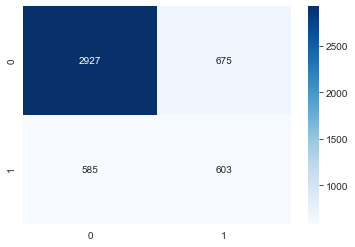

In [45]:
# Confusion matrix: the diagonal is the number of prediction pairs and the total of each row is the number of prediction sets
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,fmt="d",cmap='Blues')


In [46]:
# classification report
from sklearn.metrics import classification_report
target_names = ['Rejected','Accepted']
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.83      0.81      0.82      3602
    Accepted       0.47      0.51      0.49      1188

    accuracy                           0.74      4790
   macro avg       0.65      0.66      0.66      4790
weighted avg       0.74      0.74      0.74      4790



### SVM

In [47]:

parameters = {
    'C':[4.5, 5, 5.5], 
    'gamma':[0.0009, 0.001,0.0011]
}
random_search_svc = RandomizedSearchCV(SVC(), parameters, cv=5, scoring='accuracy', n_iter=10)

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_svc.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('Best parameter:',random_search_svc.best_params_)
print('Highest validation set score:',random_search_svc.best_score_)

Time taken: 0 hours 34 minutes and 44.57 seconds.
Best parameter: {'gamma': 0.0011, 'C': 5.5}
Highest validation set score: 0.6982575316455424


In [48]:
# best model
best_model = random_search_svc.best_estimator_
print('Accuracy on test set:', best_model.score(X_test, y_test))

Accuracy on test set: 0.7793319415448852


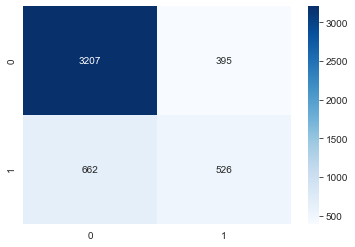

In [49]:
# Confusion matrix: the diagonal is the number of prediction pairs and the total of each row is the number of prediction sets
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,fmt="d",cmap='Blues')


In [50]:
# classification report
from sklearn.metrics import classification_report
target_names = ['Rejected','Accepted']
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.83      0.89      0.86      3602
    Accepted       0.57      0.44      0.50      1188

    accuracy                           0.78      4790
   macro avg       0.70      0.67      0.68      4790
weighted avg       0.76      0.78      0.77      4790



### Naive_bayes

In [51]:

parameters = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}
grid_search_NB = GridSearchCV(MultinomialNB(), parameters, cv=5, scoring='accuracy')

start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search_NB.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('Best parameter:',grid_search_NB.best_params_)
print('Highest validation set score:',grid_search_NB.best_score_)

Time taken: 0 hours 0 minutes and 0.59 seconds.
Best parameter: {'alpha': 10.0}
Highest validation set score: 0.7133794379395335


In [52]:
# best model
best_model = grid_search_NB.best_estimator_
print('Accuracy on test set:', best_model.score(X_test, y_test))

Accuracy on test set: 0.7480167014613779


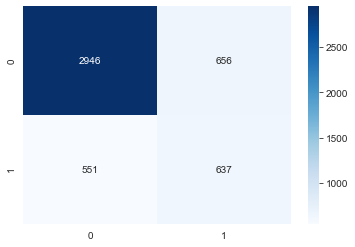

In [53]:
# Confusion matrix: the diagonal is the number of prediction pairs and the total of each row is the number of prediction sets
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,fmt="d",cmap='Blues')


In [54]:
# classification report
from sklearn.metrics import classification_report
target_names = ['Rejected','Accepted']
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.84      0.82      0.83      3602
    Accepted       0.49      0.54      0.51      1188

    accuracy                           0.75      4790
   macro avg       0.67      0.68      0.67      4790
weighted avg       0.76      0.75      0.75      4790



### KNN

In [55]:

parameters = {
    'n_neighbors':[3, 4, 5], 
    'weights':['uniform', 'distance']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='accuracy')

start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search_knn.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('Best parameter:',grid_search_knn.best_params_)
print('Highest validation set score:',grid_search_knn.best_score_)

Time taken: 0 hours 0 minutes and 40.06 seconds.
Best parameter: {'n_neighbors': 4, 'weights': 'distance'}
Highest validation set score: 0.8179814742370664


In [56]:
# best model
best_model = grid_search_knn.best_estimator_
print('Accuracy on test set:', best_model.score(X_test, y_test))

Accuracy on test set: 0.6701461377870563


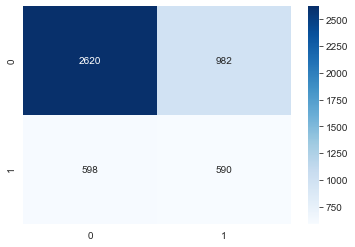

In [57]:
# Confusion matrix: the diagonal is the number of prediction pairs and the total of each row is the number of prediction sets
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,fmt="d",cmap='Blues')


In [58]:
# classification report
from sklearn.metrics import classification_report
target_names = ['Rejected','Accepted']
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.81      0.73      0.77      3602
    Accepted       0.38      0.50      0.43      1188

    accuracy                           0.67      4790
   macro avg       0.59      0.61      0.60      4790
weighted avg       0.71      0.67      0.68      4790



### DecisionTree

In [59]:

parameters = {
    'max_depth':[5, 7, 9], 
    'min_samples_leaf':[2, 3, 4]
}
random_search_DT = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='accuracy', n_iter=10)

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_DT.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('Best parameter:',random_search_DT.best_params_)
print('Highest validation set score:',random_search_DT.best_score_)

Time taken: 0 hours 1 minutes and 24.37 seconds.
Best parameter: {'min_samples_leaf': 4, 'max_depth': 9}
Highest validation set score: 0.7073959741421716


In [60]:
# best model
best_model = random_search_DT.best_estimator_
print('Accuracy on test set:', best_model.score(X_test, y_test))

Accuracy on test set: 0.6901878914405011


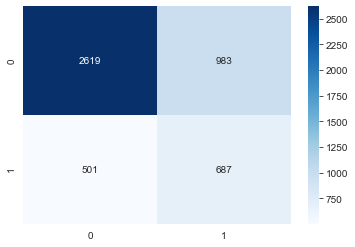

In [61]:
# Confusion matrix: the diagonal is the number of prediction pairs and the total of each row is the number of prediction sets
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,fmt="d",cmap='Blues')


In [62]:
# classification report
from sklearn.metrics import classification_report
target_names = ['Rejected','Accepted']
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.84      0.73      0.78      3602
    Accepted       0.41      0.58      0.48      1188

    accuracy                           0.69      4790
   macro avg       0.63      0.65      0.63      4790
weighted avg       0.73      0.69      0.71      4790



### XGBoost

In [63]:
parameters = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4]
}
model = RandomizedSearchCV(XGBClassifier(), parameters, cv=5, scoring='accuracy', n_iter=10)

start_time = timer(None) # timing starts from this point for "start_time" variable
model.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('Best parameter:',model.best_params_)
print('Highest validation set score:',model.best_score_)

[20:32:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:35:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [64]:
# best model
best_model = model.best_estimator_
print('Accuracy on test set:', best_model.score(X_test, y_test))

Accuracy on test set: 0.7419624217118997


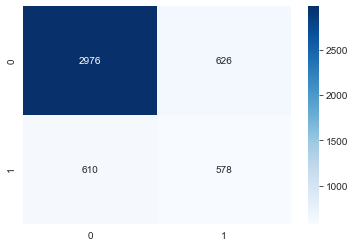

In [65]:
# Confusion matrix: the diagonal is the number of prediction pairs and the total of each row is the number of prediction sets
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,fmt="d",cmap='Blues')


In [66]:
# classification report
from sklearn.metrics import classification_report
target_names = ['Rejected','Accepted']
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.83      0.83      0.83      3602
    Accepted       0.48      0.49      0.48      1188

    accuracy                           0.74      4790
   macro avg       0.65      0.66      0.66      4790
weighted avg       0.74      0.74      0.74      4790



### LightGBM

In [67]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'num_leaves':[20,40,60,80,100],
    'min_child_samples':[5,10,15],
    'max_depth':[-1,5,10,20],
    'learning_rate':[0.05,0.1,0.2],
    'reg_alpha':[0,0.01,0.03]
}
model = RandomizedSearchCV(LGBMClassifier(),parameters,scoring='accuracy', n_iter=50)

start_time = timer(None) # timing starts from this point for "start_time" variable
model.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('Best parameter:',model.best_params_)
print('Highest validation set score:',model.best_score_)

Time taken: 0 hours 8 minutes and 25.44 seconds.
Best parameter: {'reg_alpha': 0.03, 'num_leaves': 100, 'min_child_samples': 15, 'max_depth': -1, 'learning_rate': 0.2}
Highest validation set score: 0.8431731786786962


In [68]:
# best model
best_model = model.best_estimator_
print('Accuracy on test set:', best_model.score(X_test, y_test))

Accuracy on test set: 0.7394572025052192


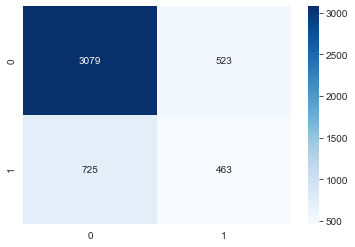

In [69]:
# Confusion matrix: the diagonal is the number of prediction pairs and the total of each row is the number of prediction sets
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,fmt="d",cmap='Blues')


In [70]:
# classification report
from sklearn.metrics import classification_report
target_names = ['Rejected','Accepted']
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.81      0.85      0.83      3602
    Accepted       0.47      0.39      0.43      1188

    accuracy                           0.74      4790
   macro avg       0.64      0.62      0.63      4790
weighted avg       0.73      0.74      0.73      4790

